# Exercise Group - Chapter 2

Below you find exercises for chapter 2. These exercises will prepare you in particular for the obligatory mid-term tests. The purpose of the prepared code snippets below is to give you some helpful structure for coding by predefining some useful variable names, but you do not need to use these prepared code snippets and prepared variable names if you do not want to. Do not hestitate to use the function `help()` to print the documentation of the functions that you need. If you are stuck, please ask one of the supervisors present.

In the shared folder you will find a subfolder `data` containing important time series. You may copy them to your "*my_materials*" folder in order to import the data from there if you like.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

from scipy.optimize import minimize
import os
os.getcwd()

'/home/jovyan/my_materials'

After running the import-statements above there should be a line displayed with '/home/jovyan/my_materials'.

<br><br>

# Topic 1: Historical Simulation

In the directory `data` you will find a file named `DAX_index.csv`. It contains the daily closing levels $V_{n}$, $n \in \{0, \dots, N\}$, of the German DAX index between 03 January 2000 and 11 October 2024, making up for a total of $N + 1 = 6310$ data points. In this exercise we want to calculate the VaR estimates for the DAX timeseries using the method of historical simulation as outlined in Section 2.3. Additionally, the goal is to obtain confidence intervals for the VaR estimates using the method in Section 2.3.2.. 

In [2]:
dax_data = np.loadtxt('../shared_materials/data/DAX_index.csv', skiprows=1, usecols=1, delimiter=',')

<br>

## Step 1: Compute the Value-at-Risk Estimates

Compute the VaR estimates at level $\alpha = 0.95$ for each trading day after the first trading year using $L_{n + 1} = -\big(V_{n + 1} - V_n\big) = S_n (1 - \exp(X_{n+1}))$ as losses, where $(X_n)_{n \in \{1, \dots, N\}}$ are the log-returns.

**Task 1.1**: Define an array `L` that contains the losses. Then, define an array `L_windows` of shape `(N - 252, 252)` that contains windows of length 252 of the DAX time series. That is, the `i`th row of `L_windows` should contain the array `L[i:(i + 252)]`.

In [3]:
# Set parameters
alpha = 0.95
td = 252

In [4]:
# Set Losses
L = -np.diff(dax_data)
L_windows = np.zeros((len(dax_data)-td, td))

In [5]:
# Get L_windows
for i in range(len(dax_data)-td):
    L_windows[i] = L[i:(i+td)]

# print(L_windows[1], L_windows.shape)

**Task 1.2**: Our goal is now to compute the 0.95-VaR estimate $\widehat{\mathrm{VaR}_{0.95}}(L_{n+1})$ using the method of historical simulation outlined in Section 2.3.3 based on the previous $252$ observations. That is, for each $n \in \{252, \dots, N\}$, we want to use the past year of losses $L_{i}$, $i \in \{n-251, \dots n\}$, in order to obtain the empirical 0.95-quantile of the conditional law of $L_{n + 1}$. To do so, write a function `value_at_risk(windows, alpha)` that takes an array `windows` of shape `(M, 252)` as an input and computes the empirical `alpha`-quantile of each row. The output of your function should have shape `(M,)` and your function should contain no `for`-loops. Then store the output of your function applied to the array `L_windows` and `alpha=0.95` in an array `VaR`.

In [6]:
#Ref p.30 -- no for-loopiessss (this is the VaR estimate --> used for plot)
def value_at_risk(window, alpha):
    return np.quantile(a=window, q=alpha, method='higher', axis=1) #higher to get actual value in dataset

VaR = value_at_risk(L_windows, alpha=0.95)
VaR

array([178.99, 178.99, 178.99, ..., 228.09, 228.09, 228.09])

<br>

## Step 2: Compute Confidence Intervals for the Value-at-Risk

We would now like to obtain a confidence interval at level $p = 0.99$ for each of the Value-at-Risk estimates stored in the array `VaR` using the approach from Section 2.3.2.

**Task 1.3**: Compute the integer $i$ from equation (2.6) in the lecture notes. That is, the integer $i$ is given by $1$ plus the $\frac{1 + p}{2} = 0.995$-quantile of the binomial distribution with parameters $m = 252$ and $1 - \alpha = 0.05$.

*Useful Python commands*: The $q$-quantile of the binomial distribution with parameters $m$ and $p$ can be computed by the `scipy` command `binom(m, p).ppf(q)`.

In [7]:
# $$ Reference:Confidence intervals -  page 29

In [8]:
# Roberts Lösung
import scipy.stats as stats
p = 0.99
td = 252
alpha = 0.95
probability = round((1+p) / 2, 3)

i_val = 1 + stats.binom.ppf(q=probability, n=td, p=1-alpha)
print(f"i_val: {i_val}")

p = 0.99
td = 252
alpha = 0.95
probability = round((1-p) / 2, 3)
j_val = stats.binom.ppf(q=probability, n=td, p=1-alpha)
print(f"j_val: {j_val}")

i_val: 23.0
j_val: 5.0


In [9]:
for i in range(2, td): 
    # F_B(i-2) < 1+p / 2
    cond = stats.binom.cdf(k=i-2, n=td, p=1-alpha) < (1+p)/2
    if not cond:
        break
print(i-1)

for j in range(2, td): 
    # F_B(j-1) <= 1-p / 2
    cond = stats.binom.cdf(k=j-1, n=td, p=1-alpha) <= (1-p)/2
    if not cond:
        break
print(j-1)

23
5


In [10]:
# Set parameters - $$Reference: [2.6]
alpha = 0.95
p0 = 0.99

In [11]:
# j.value - $$Reference: [2.6]
i_val = 1 + stats.binom(td, 1-alpha).ppf((1+p0)/2)
i_val

np.float64(23.0)

**Task 1.4**: Compute the integer $j$ from equation (2.7) in the lecture notes. That is, the integer $j$ is given by $1$ plus the $\frac{1 - p}{2} = 0.005$-quantile of the binomial distribution with parameters $m = 252$ and $1 - \alpha = 0.05$.

In [12]:
# j.value - $$Reference: [2.7]
j_val = stats.binom(td, 1-alpha).ppf((1-p0)/2)
j_val

np.float64(5.0)

**Task 1.5**: For each $n \in \{1, \dots, N-1\}$, compute the lower confidence boundary $X_{i:n}$ as well as the upper confidence boundary $X_{j:n}$ (see Section 2.3.2) using the corresponding integers $i$ and $j$ stored in the arrays `i_arr` and `j_arr`. Store the lower and upper confidence boundaries in arrays `VaR_lower` and `Var_upper`.

*Useful Python commands*: `np.sort`, `np.quantile`.

In [13]:
# $$ Reference Order statistics --> from highest to lowest - Empirical quantiles p.27

In [14]:
# Get n-VaR-values
VaR_upper = np.zeros((len(VaR)))
VaR_lower = np.zeros((len(VaR)))

for i in range(len(VaR)):
    sorted_windows = np.sort(L_windows[i, :])[::-1] # descending (sorted by size - high to low) 
    VaR_upper[i] = sorted_windows[int(i_val) - 1] #Recall 1-1 error
    VaR_lower[i] = sorted_windows[int(j_val) - 1]

print(VaR_lower, VaR_upper, VaR)

[231.   231.   231.   ... 282.37 282.37 282.37] [150.26 148.29 148.29 ... 161.13 161.13 161.13] [178.99 178.99 178.99 ... 228.09 228.09 228.09]


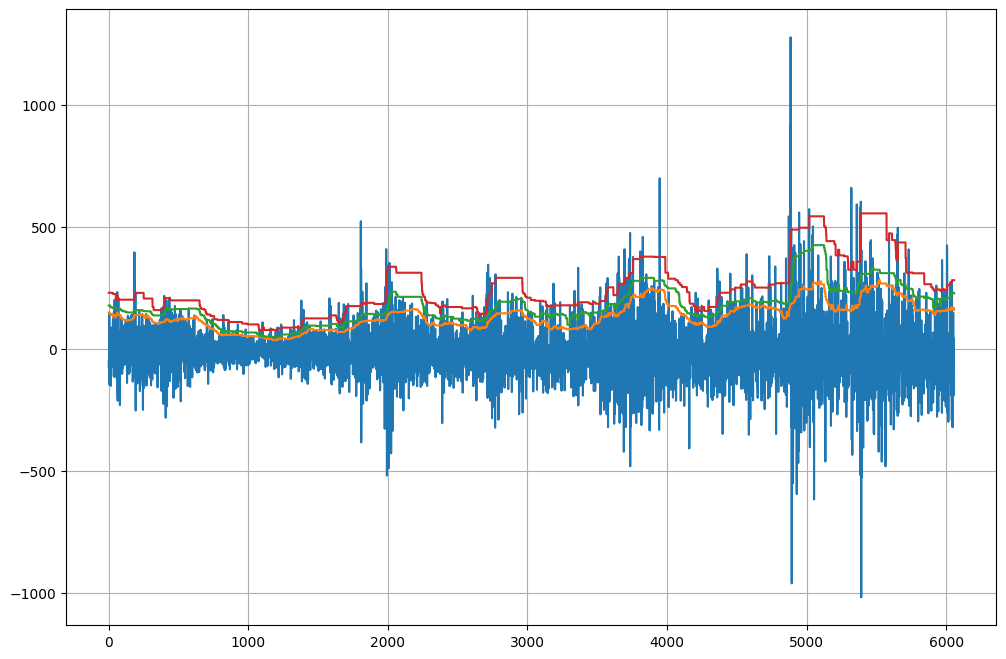

In [15]:
# Grafical test
plt.figure(figsize=(12, 8))
plt.plot(L[td:])
plt.plot(VaR_upper)
plt.plot(VaR)
plt.plot(VaR_lower)

plt.grid()
plt.show()

<br>

## Step 3: Plot the VaR Estimates and Interpret the Results


**Task 1.6** Plot the Value-at-Risk estimates stored in the array `VaR` as well as the lower and upper confidence bounds for the VaR stored in the arrays `VaR_lower` and `VaR_upper` in a common plot. What do you observe? Compare your output to the parametric Gaussian VaR estimates from Week 2, Task 1.2.

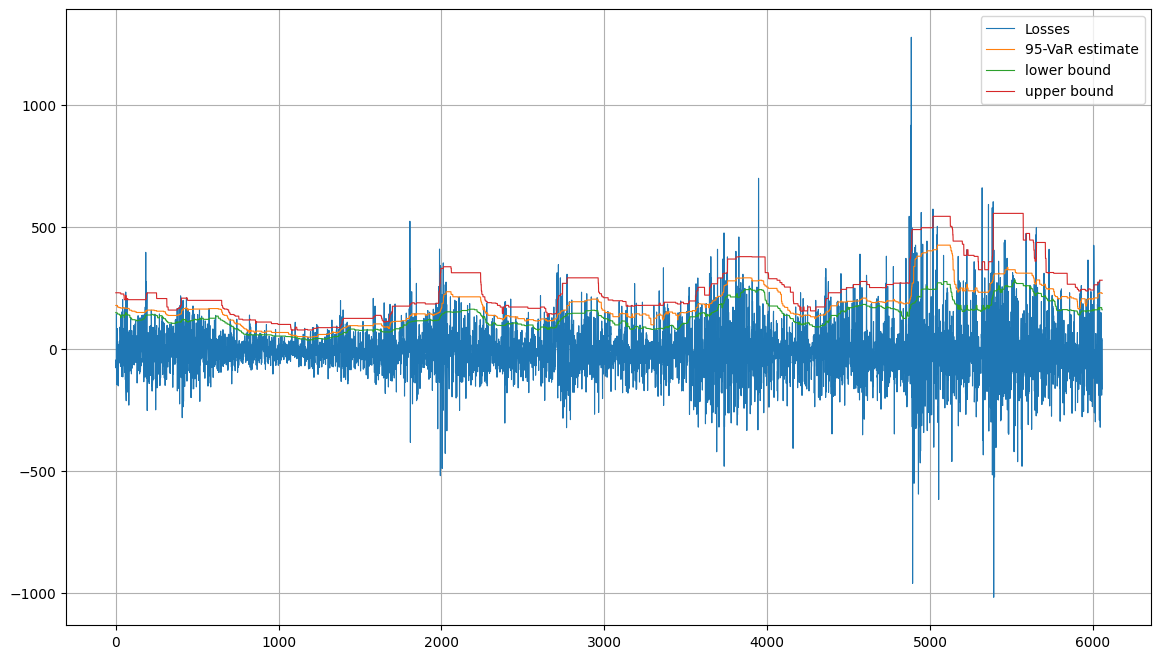

In [16]:
# Plot data
plt.figure(figsize=(14, 8))
plt.plot(L[td:], label="Losses", linewidth=0.8)
plt.plot(VaR, label="95-VaR estimate", linewidth=0.8)
plt.plot(VaR_upper, label="lower bound", linewidth=0.8)
plt.plot(VaR_lower, label="upper bound", linewidth=0.8)
 
plt.legend()
plt.grid()
plt.show()

<br><br>

# Topic 2: The Empirical CDF and Bootstrapping the Expected Shortfall

The goal of this exercise is to visualize the convergence stated in Theorem 2.3 and to use the empirical cdf of a sample in order to construct nonparametric confidence intervals, in our case of the Expected Shortfall.

<br> 

## Step 1: Generate Samples of the Normal Distribution

**Task 2.1**: Generate samples of the Standard Normal distribution $N(0, 1)$ with 10, 100, 1000 and 10000 observations, respectively. Use the `numpy` random seed 10 for reproducibility.

In [17]:
np.random.seed(10)

In [18]:
# Get random samples
normal_sample_10 = np.random.normal(0, 1, 10)
normal_sample_100 = np.random.normal(0, 1, 100)
normal_sample_1000 = np.random.normal(0, 1, 1000)
normal_sample_10000 = np.random.normal(0, 1, 10000)

<br>

## Step 2: Visualize the Glivenko-Cantelli Theorem

**Task 2.2**: In a single plot, draw the empirical cdfs of the samples you generated next to the true cdf of the $N(0, 1)$ distribution over the interval $x \in [-4, 4]$.

In [19]:
# True cdf
x_random_range = np.linspace(-4, 4)
true_normal_cdf = stats.norm.cdf(x_random_range, loc=0, scale=1)

In [20]:
# Function empiricial cdf -- idea: sort sample for x-values and compute y-values 
def get_empirical_cdf(sample):
    sort_sample = np.sort(sample)
    emp_cdf = np.arange(1, len(sample) + 1) / len(sample)
    return [sort_sample, emp_cdf]

In [21]:
# Get cdfs
x_value_10, y_value_10 = get_empirical_cdf(normal_sample_10)
x_value_100, y_value_100 = get_empirical_cdf(normal_sample_100)
x_value_1000, y_value_1000 = get_empirical_cdf(normal_sample_1000)
x_value_10000, y_value_10000 = get_empirical_cdf(normal_sample_10000)

In [22]:
test = get_empirical_cdf(normal_sample_10000)
test[1]

array([1.000e-04, 2.000e-04, 3.000e-04, ..., 9.998e-01, 9.999e-01,
       1.000e+00])

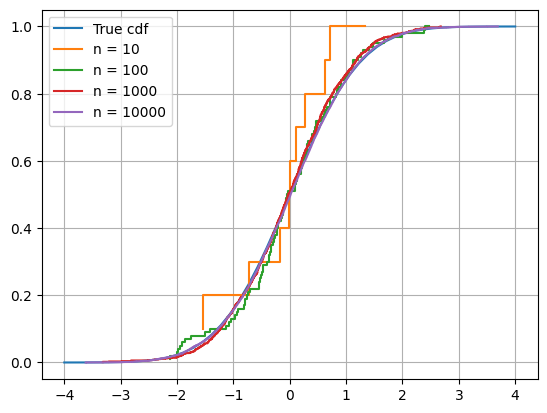

In [23]:
# Plot
plt.plot(x_random_range, true_normal_cdf, label="True cdf")

# empirical cdfs
plt.step(x_value_10, y_value_10, label="n = 10")
plt.step(x_value_100, y_value_100, label="n = 100")
plt.step(x_value_1000, y_value_1000, label="n = 1000")
plt.step(x_value_10000, y_value_10000, label="n = 10000")

plt.legend()
plt.grid()
plt.show()

<br>

## Step 3: Computing Confidence Intervals for the Expected Shortfall via Bootstrap Methods

We now want to plot the 0.95-Expected Shortfall $\widehat{\mathrm{ES}_{0.95}}(L_{n + 1})$ together with a 99%-confidence interval for it in the same fashion as for the Value-at-Risk in Task 1.6.

**Task 2.3**: We want to compute the 0.95-ES estimate $\widehat{\mathrm{ES}_{0.95}}(L_{n+1})$ using the method of historical simulation outlined in Section 2.3.3 based on the previous $252$ observations. That is, for each $n \in \{252, \dots, N\}$, we want to use the past year of losses $L_{i}$, $i \in \{n-251, \dots n\}$, in order to obtain the empirical 0.95-Expected Shortfall for the law of $L_{n + 1}$. To do so, write a function `expected_shortfall(windows, alpha)` that takes an array `windows` of shape `(M, 252)` as an input and computes the empirical `alpha`-Expected Shortfall as in Section 2.3.3. The output of your function should have shape `(M,)` and your function should contain no `for`-loops. Then store the output of your function applied to the array `L_windows` and `alpha=0.95` in an array `ES`.

*Useful Python functions*: `np.sort`, `np.mean`

In [24]:
# Set Losses
L = -np.diff(dax_data)
L_windows = np.zeros((len(dax_data)-td, td))

In [25]:
# Get L_windows
for i in range(len(dax_data)-td):
    L_windows[i] = L[i:(i+td)]

#### actual task

In [26]:
# $$Reference: [p.30] - Expected shortfall
def expected_shortfall(windows, alpha):
    # 1) Sort values
    sorted_windows = np.sort(windows, axis=1)[:, ::-1]
    
    # 2) Calculate average of tail
    tail_bound = int((1 - alpha) * sorted_windows.shape[1]) #wrong?
    
    return np.mean(sorted_windows[:, :tail_bound], axis=1)

In [27]:
# Test ES
ES = expected_shortfall(L_windows, 0.95)
ES

array([221.73666667, 221.73666667, 221.73666667, ..., 297.64      ,
       297.64      , 297.64      ])

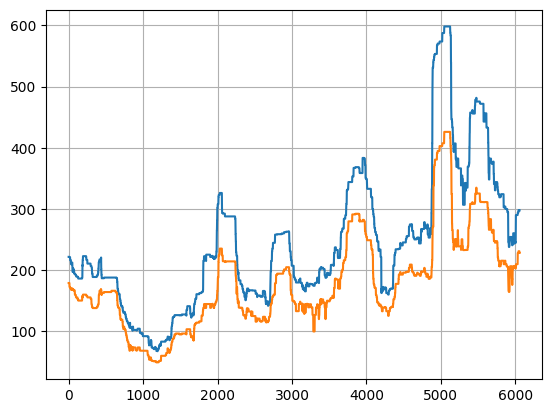

In [28]:
plt.plot(ES)
plt.plot(VaR)

plt.grid()
plt.show()

A widely used method to compute nonparametric confidence intervals of some sample statistic like the Expected Shortfall is the *Bootstrap method*. Suppose you have an iid data sample $X = (X_1, \dots, X_N)$ and you would like to obtain a confidence interval at level $\beta$ for some statistic $T(X)$ (in our case, $T(X)$ is the 0.95-Expected Shortfall of the sample $X$). The Bootstrap method proceeds by pretending that the true cdf of the distribution of the $X_i$ is equal to the empirical cdf of your sample. Afterwards, the Bootstrap method simulates $B$ different samples $X^{(b)} = (X^{(b)}_1, \dots, X^{(b)}_N)$, $b \in \{1, \dots, B\}$ from the empirical cdf. These $B$ samples can be used to calculate $B$ realisations of your statistic, $T(X^{(1)}), \dots, T(X^{(b)})$. You can then obtain the boundaries of a two-sided confidence interval at level $\beta$ for your statistic by computing the empirical $\frac{1-\beta}{2}$ quantile and the empirical $\frac{1 + \beta}{2}$ quantile of the realisations $T(X^{(1)}), \dots, T(X^{(b)})$.

**Task 2.4**: Calculate a 99%-confidence interval via the Bootstrap method for each expected shortfall estimate stored in the array `ES`. Store the lower and upper confidence boundaries in arrays `ES_lower` and `ES_upper`. Your code should proceed in the following steps:
- Write a `for`-loop over the different 1-year-windows of losses stored as rows in the array `L_windows`
- For each window, simulate $B = 1000$ samples of length 252 from the empirical cdf of the window. *Hint*: Simulating a sample of length 252 from the empirical cdf of the window is equivalent to drawing 252 times from the window with replacement.
- Then, for each window, use your function `expected_shortfall` to simultatenously compute the empirical 0.95-expected shortfall of each of the $B = 1000$ different samples.
- Finally, fow each window, compute the empirical 0.005-quantile and the empirical 0.995-quantile if the 1000 different expected shortfall estimates to obtain a confidence interval at level 0.99.

*Useful Python functions*: `np.quantile`. You can draw 1000 samples of length 252 with replacement from an array `arr` by using `np.random.choice(arr, size=(1000, 252), replace=True)`.

In [29]:
# Set Parameters
B = 1000
alpha = 0.95
ES_lower = np.zeros(len(ES))
ES_upper = np.zeros(len(ES))

In [30]:
for n in range(L_windows.shape[0]):
    # window length td
    window = L_windows[n, :]
    bootstrapped_windows = np.random.choice(window, size=(1000, 252), replace=True)
    
    # Calculate ES
    ES_bootstrapped = expected_shortfall(bootstrapped_windows, alpha)
    ES_lower[n], ES_upper[n] = np.quantile(ES_bootstrapped, 1-alpha), np.quantile(ES_bootstrapped, alpha)
    

**Task 2.5**: Similar to Task 1.6, plot the Expected Shortfall estimates stored in the array `ES` as well as the lower and upper confidence bounds for the ES computed in Task 2.4 in a common plot. What do you observe? Compare your output to the plot from Task 1.6.

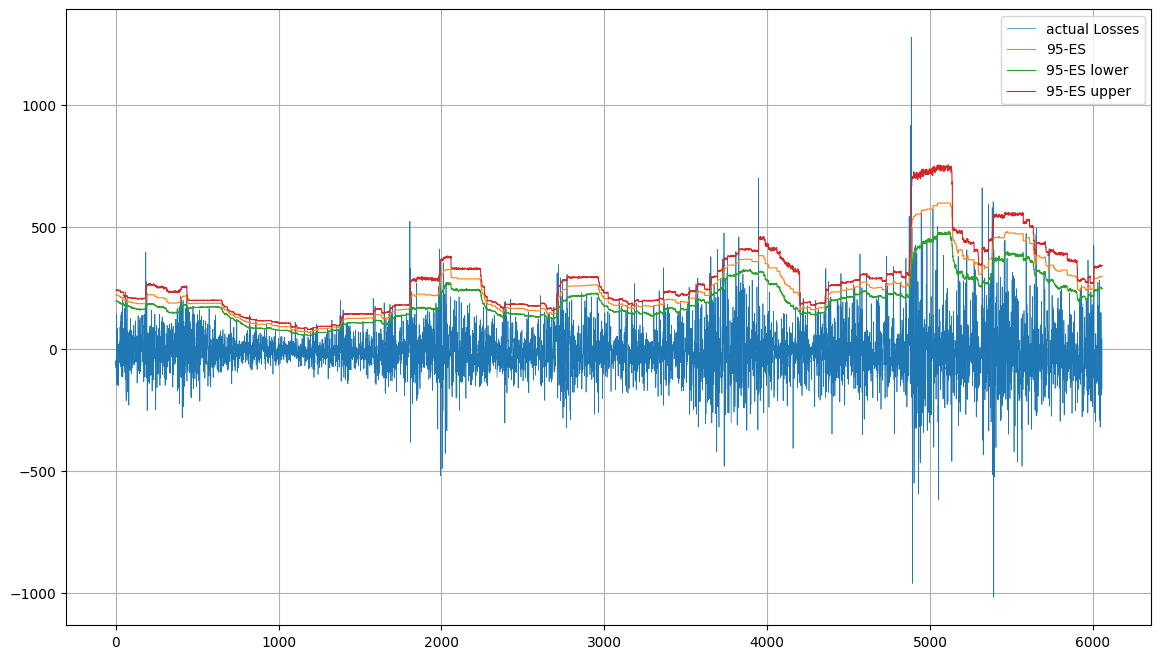

In [31]:
plt.figure(figsize=(14, 8))
plt.plot(L[td:], label="actual Losses", linewidth=0.5)
plt.plot(ES, label="95-ES", linewidth=0.8)
plt.plot(ES_lower, label="95-ES lower", linewidth=0.8)
plt.plot(ES_upper, label="95-ES upper", linewidth=0.8)

plt.legend()
plt.grid()
plt.show()

<br><br>

# Topic 3: Monte Carlo Methods

Suppose you want to invest at the current time $N$ in the DAX index $V$ over the time horizon of ten days. You would like to model negative (percentage) returns as a loss, i.e. $L_{N + 10} = -\big(\frac{V_{N + 10}}{V_N} - 1\big) = 1 - \exp(X_{N+10})$, where $(X_n)_{n \in \{1, \dots, N\}}$ are the log-returns. Your goal is to obtain estimates of the 10-day Value-at-Risk (VaR) and Expected Shortfall (ES) corresponding to this loss. The aim of this exercise is to obtain the level $\alpha = 0.95$ VaR and ES estimates $\widehat{\mathrm{VaR}_{0.95}}(L_{N + 10})$ and $\widehat{\mathrm{ES}_{0.95}}(L_{N + 10})$ by fitting a GARCH(1, 1) model to the logarithmic returns of the DAX and then using the Monte Carlo method from Section 2.5.

<br>

## Step 1: Estimating the GARCH(1, 1) Parameters using Maximum-Likelihood Estimation

The goal of this step is to estimate the parameters $\alpha_0, \alpha_1, \beta$ and $\sigma^2_0$ of the GARCH(1, 1) model using the method described in Example 2.7:

**Task 3.1**: Define a function `sigma_sq_from_data` that takes the log-returns $(X_n)_{n \in \{0, \dots, N\}}$ as an input variable `x`, which should be an array of length $N + 1$, followed by the parameters of the GARCH(1, 1) model. It returns the corresponding GARCH variance sequence $(\sigma^2_n)_{n \in \{0, \dots, N\}}$ computed by the recursion from Section 2.1.5.

In [32]:
# Set parameters --> why N + 1 ???
import math

lr = np.diff(np.log(dax_data))
len(lr), len(dax_data)

(6309, 6310)

In [33]:
def sigma_sq_from_data(x, alpha_0, alpha_1, beta, sigma_sq_0):
    # Set pre-loop data
    sigma_sq = np.zeros(len(x))
    sigma_sq[0] = sigma_sq_0

    # Get sigma_sq --> watch out with index, that's why range from 1 to len(x)
    for n in range(1, len(x)):
        sigma_sq[n] = alpha_0 + alpha_1 * x[n-1]**2 + beta * sigma_sq[n-1]
    
    return sigma_sq

In [34]:
# Test sigma_sq function
len(sigma_sq_from_data(lr, 1, 0.5, 0.4, 0.04))

6309

**Task 3.2**: Define a function `neg_log_lik_GARCH_11` which takes the parameter vector $\theta = (\alpha_0, \alpha_1, \beta, \sigma^2_0)$ and the array `x` of log-returns as input variables and returns the negative joint log-likelihood corresponding to the GARCH(1, 1) model as in Section 2.4 and Example 2.7.

*Useful Python functions*: `np.log`

In [41]:
def neg_log_lik_GARCH_11(theta, x):
    # GARCH parameters
    alpha = theta[0]
    alpha_1 = theta[1]
    beta = theta[2]
    sigma_sq_0 = theta[3]
    
    # Set pre-loop data container
    sigma_sq = np.zeros(len(x))
    log_lik = np.zeros(len(x))
    
    # 1.Get GARCH sigmas
    sigma_sq = sigma_sq_from_data(x, alpha, alpha_1, beta, sigma_sq_0)

    # 2.Get likelihoodey's
    for n in range(len(x)):
        log_lik[n] = x[n] ** 2 / (2*sigma_sq[n]) + 0.5 * np.log(2* np.pi * sigma_sq[n]) #not negative since we minimize here
    
    return sum(log_lik) # --> log rule product of log is the sum of the logs

In [42]:
# Set parameters
alpha_0 = 1
alpha_1 = 0.5
beta = 0.5
sigma_sq_0 = 0.04

theta = [alpha_0, alpha_1, beta, sigma_sq_0]

In [43]:
# Test GARCH function
likelihood = neg_log_lik_GARCH_11(theta, lr)
print(likelihood)

7982.206765797466


**Task 3.3**: Compute the log-returns of the DAX series and store them in an array `log_returns`. Then, define an initial guess of parameter values stored in an array `init` and then compute the Maximum-Likelihood estimates for the GARCH(1, 1) parameters by using the `scipy` function `minimize` on your function `neg_log_lik_GARCH_11`. Print your resulting parameter estimates.

In [44]:
# Initial values
log_returns = np.diff(np.log(dax_data))
init = [1, 0.02, 0.02, 0.0002]

# Optimize the log-lik
alpha_0, alpha_1, beta, sigma_sq_0 = minimize(neg_log_lik_GARCH_11, args=log_returns, x0=init, bounds=((1e-6, 5), (0, 5), (0, 1), (1e-6, 5))).x
print('The estimated parameters are alpha_0 = {:.3e}, alpha_1 = {:.5f}, beta = {:.5f}, sigma^2_0 = {:.5f}.'.format(alpha_0, alpha_1, beta, sigma_sq_0))

The estimated parameters are alpha_0 = 1.463e-04, alpha_1 = 0.32004, beta = 0.00000, sigma^2_0 = 2.41054.


<br><br>

## Step 2: Simulate Future Trajectories of the Fitted GARCH(1, 1) Model

In order to estimate the VaR and the ES using the method described in Section 2.5.1, we need multiple samples of the losses $L_{N + 10}$ over the period of 10 days. To compute samples of $L_{N + 10}$, we first need multiple samples of the index level $V_{N + 10}$ in 10 days.

**Task 2.4**: Use the function `sigma_sq_from_data` from the task above to obtain the past GARCH variance sequence $(\sigma^2_n)_{n \in \{0, \dots, N\}}$. Use the DAX log-returns `log_returns` as well as the Maximum-Likelihood estimates `alpha_0`, `alpha_1`, `beta` and `sigma_sq_0` computed in Step 1 as inputs to this function. Store the output of this function in an array `sigma_sq_historical`.

In [ ]:
np.random.seed(10)

In [ ]:
sigma_sq_historical = ...

**Task 2.5**: Simulate $m = 10\,000$ trajectories of length $k = 10$ of the GARCH(1, 1) variance $(\sigma^2_n)_{n \in \{N + 1, \dots, N + 10\}}$ as well as $m = 10\,000$ trajectories of corresponding GARCH(1, 1) log-returns process $(X_n)_{n \in \{N + 1, \dots, N + 10\}}$ according to the recursions given in Section 2.1.5 and store them in arrays `sim_sigma_sq` and `sim_garch_X` of shape `(m, k)` . Use the final values `sigma_sq_historical[-1]` and `log_returns[-1]` as initial values for the recursive computations of $(\sigma^2_n)_{n \in \{N + 1, \dots, N + 10\}}$ and $(X_n)_{n \in \{N + 1, \dots, N + 10\}}$. Use the command `numpy.random.seed(10)` for reproducibility.

*Useful Python commands*: `np.random.normal`, `np.sqrt`

In [ ]:
m = 10000
k = 10

sim_sigma_sq = np.zeros((m, k))
sim_garch_X = np.zeros((m, k))

...

<br><br>

## Step 3: Compute VaR and ES Estimates

Using the simulated GARCH trajectories, we are now able to compute the losses $L_{N + 10}$ over the period of 10 days.

**Task 2.3**: Define an array `loss` of length $m = 10\,000$ that contains the multiple simulated losses $L_{N + 10} = -\big(\frac{V_{N + 10}}{V_N} - 1\big) = 1 - \exp(X_{N+10})$. Define an additional array `loss_sorted` that contains the elements of `loss` in descending order.

*Useful Python commands*: `np.exp`, `np.sort`

In [ ]:
loss = ...
loss_sorted = ...

**Task 2.4**: Compute and print the estimates $\widehat{\mathrm{VaR}_{0.95}}(L_{N + 10})$ and $\widehat{\mathrm{ES}_{0.95}}(L_{N + 10})$ using the Monte Carlo method from Section 2.5.1.

*Useful Python commands*: `np.mean`

In [ ]:
VaR = ...
ES = ...

print('0.95-VaR for the 10-day percentage loss: {:.4f}%. 0.95-ES for the 10-day percentage loss: {:.4f}%.'.format(100 * VaR, 100 * ES)) 